In [2]:
import pandas as pd
detail = pd.read_csv('data/detail.csv',
    index_col=0,encoding = 'gbk')

In [3]:
detail.head()

,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
detail_id,,,,,,,,,,,,,,,,,,
2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016/8/111:05:00,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
2958,417,609957,NaN,NaN,蒙古烤羊腿,0,1,48,NaN,2016/8/111:07:00,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016/8/111:07:00,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442
2966,417,610038,NaN,NaN,芝麻烤紫菜,0,1,25,NaN,2016/8/111:11:00,NaN,NaN,NaN,0,NaN,NaN,caipu/105002.jpg,1442
2968,417,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016/8/111:11:00,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1442


In [4]:
len(dishes_name)

NameError: name 'dishes_name' is not defined

In [ ]:
##方法一
##定义去重函数
def delRep(list1):
    list2=[]
    for i in list1:
        if i not in list2:
            list2.append(i)
    return list2 
## 去重
dishes=list(detail['dishes_name']) ##将dishes_name从数据框中提取出来
print('去重前菜品总数为：',len(dishes)) 
dish = delRep(dishes) ##使用自定义的去重函数去重
print('方法一去重后菜品总数为：',len(dish))


# 代码 5-10
##方法二
print('去重前菜品总数为：',len(dishes)) 
dish_set = set(dishes) ##利用set的特性去重
print('方法二去重后菜品总数为：',len(dish_set))







In [5]:
# 代码 5-11
##对dishes_name去重
dishes_name = detail['dishes_name'].drop_duplicates()
print('drop_duplicates方法去重之后菜品总数为：',len(dishes_name))


drop_duplicates方法去重之后菜品总数为： 145


In [6]:
# 代码 5-12
print('去重之前订单详情表的形状为：', detail.shape)
shapeDet = detail.drop_duplicates(subset = ['order_id',
    'emp_id']).shape
print('依照订单编号，会员编号去重之后订单详情表大小为:', shapeDet)

去重之前订单详情表的形状为： (10037, 18)
依照订单编号，会员编号去重之后订单详情表大小为: (942, 18)


In [7]:
# 代码 5-14
corrDet1 = detail[['dishes_name','counts',
    'amounts']].corr(method='pearson')
print('菜品名称，销量和售价的pearson相似度为：\n',corrDet1)

菜品名称，销量和售价的pearson相似度为：
            counts   amounts
counts   1.000000 -0.159264
amounts -0.159264  1.000000


In [ ]:
# 代码 5-15
##定义求取特征是否完全相同的矩阵的函数
def FeatureEquals(df):
    dfEquals=pd.DataFrame([],columns=df.columns,index=df.columns)
    for i in df.columns:
       for j in df.columns:
           dfEquals.loc[i,j]=df.loc[:,i].equals(df.loc[:,j])
    return dfEquals
## 应用上述函数
detEquals=FeatureEquals(detail)
print('detail的特征相等矩阵的前5行5列为：\n',detEquals.iloc[:5,:5])


# 代码 5-16
##遍历所有数据
lenDet = detEquals.shape[0]
dupCol = []
for k in range(lenDet):
    for l in range(k+1,lenDet):
        if detEquals.iloc[k,l] & (detEquals.columns[l] not in dupCol):
            dupCol.append(detEquals.columns[l])
##进行去重操作
print('需要删除的列为：',dupCol)
detail.drop(dupCol,axis=1,inplace=True)
print('删除多余列后detail的特征数目为：',detail.shape[1])


# 代码 5-17
print('detail每个特征缺失的数目为：\n',detail.isnull().sum())
print('detail每个特征非缺失的数目为：\n',detail.notnull().sum())


# 代码 5-18
print('去除缺失的列前detail的形状为：', detail.shape)
print('去除缺失的列后detail的形状为：',
    detail.dropna(axis = 1,how ='any').shape)



# 代码 5-19
detail = detail.fillna(-99)
print('detail每个特征缺失的数目为：\n',detail.isnull().sum())


# 代码 5-20
## 线性插值
import numpy as np
from scipy.interpolate import interp1d
x=np.array([1,2,3,4,5,8,9,10]) ##创建自变量x
y1=np.array([2,8,18,32,50,128,162,200]) ##创建因变量y1
y2=np.array([3,5,7,9,11,17,19,21]) ##创建因变量y2
LinearInsValue1 = interp1d(x,y1,kind='linear') ##线性插值拟合x,y1
LinearInsValue2 = interp1d(x,y2,kind='linear') ##线性插值拟合x,y2
print('当x为6、7时，使用线性插值y1为：',LinearInsValue1([6,7]))
print('当x为6、7时，使用线性插值y2为：',LinearInsValue2([6,7]))

## 拉格朗日插值
from scipy.interpolate import lagrange
LargeInsValue1 = lagrange(x,y1) ##拉格朗日插值拟合x,y1
LargeInsValue2 = lagrange(x,y2) ##拉格朗日插值拟合x,y2
print('当x为6,7时，使用拉格朗日插值y1为：',LargeInsValue1([6,7]))
print('当x为6,7时，使用拉格朗日插值y2为：',LargeInsValue2([6,7]))

##样条插值
from scipy.interpolate import spline
##样条插值拟合x,y1
SplineInsValue1 = spline(x,y1,xnew=np.array([6,7]))
##样条插值拟合x,y2
SplineInsValue2 = spline(x,y2,xnew=np.array([6,7]))
print('当x为6,7时，使用样条插值y1为：',SplineInsValue1)
print('当x为6,7时，使用样条插值y2为：',SplineInsValue2)






###############################################################################
#######################            任务实现             #######################
###############################################################################

# 代码 5-23
import pandas as pd
detail = pd.read_csv('../data/detail.csv',
    index_col=0,encoding = 'gbk')
print('进行去重操作前订单详情表的形状为：',detail.shape)
##样本去重
detail.drop_duplicates(inplace = True)
##特征去重
def FeatureEquals(df):
    ##定义求取特征是否完全相同的矩阵的函数
    dfEquals=pd.DataFrame([],columns=df.columns,index=df.columns)
    for i in df.columns:
        for j in df.columns:
            dfEquals.loc[i,j]=df.loc[:,i].equals(df.loc[:,j])
    return dfEquals
detEquals=FeatureEquals(detail)## 应用上述函数
##遍历所有数据
lenDet = detEquals.shape[0]
dupCol = []
for k in range(lenDet):
    for l in range(k+1,lenDet):
        if detEquals.iloc[k,l] & (detEquals.columns[l] not in dupCol):
            dupCol.append(detEquals.columns[l])
##删除重复列
detail.drop(dupCol,axis=1,inplace=True)
print('进行去重操作后订单详情表的形状为：',detail.shape)


# 代码 5-24
##统计各个特征的缺失率
naRate = (detail.isnull().sum()/ \
    detail.shape[0]*100).astype('str')+'%'
print('detail每个特征缺失的率为：\n',naRate)
##删除全部均为缺失的列
detail.dropna(axis = 1,how = 'all',inplace = True)
print('经过缺失值处理后订单详情表各特征缺失值的数目为：\n',
    detail.isnull().sum())





In [13]:
# 代码 5-21
## 定义拉依达准则识别异常值函数
import numpy as np
def outRange(Ser1):
    boolInd = (Ser1.mean()-3*Ser1.std()>Ser1) | \
    (Ser1.mean()+3*Ser1.var()< Ser1)
    index = np.arange(Ser1.shape[0])[boolInd]
    outrange = Ser1.iloc[index]
    return outrange

outlier = outRange(detail['counts'])
print('使用拉依达准则判定异常值个数为:',outlier.shape[0])
print('异常值的最大值为：',outlier.max())
print('异常值的最小值为：',outlier.min())

使用拉依达准则判定异常值个数为: 209
异常值的最大值为： 10
异常值的最小值为： 3


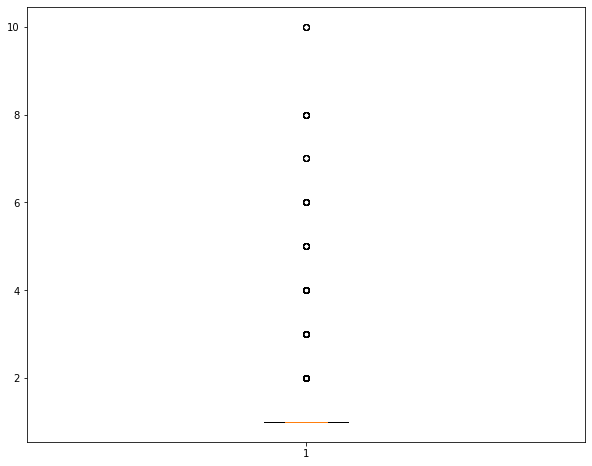

销售量数据异常值个数为： 516
销售量数据异常值的最大值为： 10
销售量数据异常值的最小值为： 2


In [12]:
# 代码 5-22

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8)) 
p = plt.boxplot(detail['counts'].values,notch=True)   ##画出箱线图
outlier1 = p['fliers'][0].get_ydata()   ##fliers为异常值的标签
plt.savefig('data/菜品异常数据识别.png')
plt.show()
print('销售量数据异常值个数为：',len(outlier1))
print('销售量数据异常值的最大值为：',max(outlier1))
print('销售量数据异常值的最小值为：',min(outlier1))

In [14]:
# 代码 5-25
##定义异常值识别与处理函数
def outRange(Ser1):
    QL = Ser1.quantile(0.25)
    QU = Ser1.quantile(0.75)
    IQR = QU-QL
    Ser1.loc[Ser1>(QU+1.5*IQR)] = QU
    Ser1.loc[Ser1<(QL-1.5*IQR)] = QL
    return Ser1
## 处理销售量和售价的异常值
detail['counts'] = outRange(detail['counts'])
detail['amounts'] = outRange(detail['amounts'])
##查看处理后的销售量和售价的最小值，最大值
print('销售量最小值为：', detail['counts'].min())
print('销售量最大值为：', detail['counts'].max())
print('售价最小值为：', detail['amounts'].min())
print('售价最大值为：', detail['amounts'].max())

销售量最小值为： 1.0
销售量最大值为： 1.0
售价最小值为： 1.0
售价最大值为： 99.0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [16]:
## 自定义离差标准化函数
def MinMaxScale(data):
    data=(data-data.min())/(data.max()-data.min())
    return data
##对菜品订单表售价和销量做离差标准化
data1=MinMaxScale(detail['counts'])
data2=MinMaxScale(detail ['amounts'])
data3=pd.concat([data1,data2],axis=1)
print('离差标准化之前销量和售价数据为：\n',
    detail[['counts','amounts']].head())
print('离差标准化之后销量和售价数据为：\n',data3.head())



# 代码 5-27
##自定义标准差标准化函数
def StandardScaler(data):
    data=(data-data.mean())/data.std()
    return data
##对菜品订单表售价和销量做标准化
data4=StandardScaler(detail['counts'])
data5=StandardScaler(detail['amounts'])
data6=pd.concat([data4,data5],axis=1)
print('标准差标准化之前销量和售价数据为：\n',
    detail[['counts','amounts']].head())
print('标准差标准化之后销量和售价数据为：\n',data6.head())



# 代码 5-28
##自定义小数定标差标准化函数
def DecimalScaler(data):
    data=data/10**np.ceil(np.log10(data.abs().max()))
    return data
##对菜品订单表售价和销量做标准化
data7=DecimalScaler(detail['counts'])
data8=DecimalScaler(detail['amounts'])
data9=pd.concat([data7,data8],axis=1)
print('小数定标标准化之前的销量和售价数据：\n',
    detail[['counts','amounts']].head())
print('小数定标标准化之后的销量和售价数据：\n',data9.head())



###############################################################################
#######################            任务实现             #######################
###############################################################################

# 代码 5-29
##自定义标准差标准化函数
def StandardScaler(data):
    data=(data-data.mean())/data.std()
    return data
##对菜品订单表售价和销量做标准化
data4=StandardScaler(detail['counts'])
data5=StandardScaler(detail['amounts'])
data6=pd.concat([data4,data5],axis = 1)
print('标准差标准化之后销量和销量数据为：','\n',data6.head(10))

离差标准化之前销量和售价数据为：
            counts  amounts
detail_id                 
2956          1.0     49.0
2958          1.0     48.0
2961          1.0     30.0
2966          1.0     25.0
2968          1.0     13.0
离差标准化之后销量和售价数据为：
            counts   amounts
detail_id                  
2956          NaN  0.489796
2958          NaN  0.479592
2961          NaN  0.295918
2966          NaN  0.244898
2968          NaN  0.122449
标准差标准化之前销量和售价数据为：
            counts  amounts
detail_id                 
2956          1.0     49.0
2958          1.0     48.0
2961          1.0     30.0
2966          1.0     25.0
2968          1.0     13.0
标准差标准化之后销量和售价数据为：
            counts   amounts
detail_id                  
2956          NaN  0.437491
2958          NaN  0.393341
2961          NaN -0.401364
2966          NaN -0.622116
2968          NaN -1.151920
小数定标标准化之前的销量和售价数据：
            counts  amounts
detail_id                 
2956          1.0     49.0
2958          1.0     48.0
2961          1.0     30.0
2

In [21]:
data=detail.loc[:,'dishes_name']   ##抽取部分数据做演示
print('哑变量处理前的数据为：\n',data)
print('哑变量处理后的数据为：\n',pd.get_dummies(data))


# 代码 5-31
##自定义等宽法离散化函数
price = pd.cut(detail['amounts'],5)
print('离散化后5条记录售价分布为：\n' ,price.value_counts())


# 代码 5-32
##自定义等频法离散化函数
def SameRateCut(data,k):
    w=data.quantile(np.arange(0,1+1.0/k,1.0/k))
    data=pd.cut(data,w)
    return data
result=SameRateCut(detail['amounts'],5).value_counts()   ##菜品售价等频法离散化
print('菜品数据等频法离散化后各个类别数目分布状况为：','\n',result)


# 代码 5-33
#自定义数据k-Means聚类离散化函数
def KmeanCut(data,k):
    from sklearn.cluster import KMeans #引入KMeans
    kmodel=KMeans(n_clusters=k)   #建立模型
    kmodel.fit(data.values.reshape((len(data), 1)))    #训练模型
    c=pd.DataFrame(kmodel.cluster_centers_).sort_values(0)   #输出聚类中心并排序
    w=c.rolling(2).mean().iloc[1:]    #相邻两项求中点，作为边界点
    w=[0]+list(w[0])+[data.max()]    #把首末边界点加上
    data=pd.cut(data,w)
    return data
#菜品售价等频法离散化
result=KmeanCut(detail['amounts'],5).value_counts()
print('菜品售价聚类离散化后各个类别数目分布状况为：','\n',result)


###############################################################################
#######################            任务实现             #######################
###############################################################################

# 代码 5-34
data=detail.loc[:5,'dishes_name']
print('哑变量处理前的数据为：\n',data.iloc[:5])
print('哑变量处理后的数据为：\n',pd.get_dummies(data).iloc[:5,:5])


# 代码 5-35
##自定义等频法离散化函数
def SameRateCut(data,k):
    w=data.quantile(np.arange(0,1+1.0/k,1.0/k))
    data=pd.cut(data,w)
    return data
result=SameRateCut(detail['amounts'],5).value_counts()   ##菜品售价等频法离散化
print('菜品数据等频法离散化后各个类别数目分布状况为：','\n',result)

哑变量处理前的数据为：
 detail_id
2956          蒜蓉生蚝
2958         蒙古烤羊腿
2961          大蒜苋菜
2966         芝麻烤紫菜
2968           蒜香包
           ...    
5683          爆炒双丝
5686          小炒羊腰
5379         香菇鹌鹑蛋
5380    不加一滴油的酸奶蛋糕
5688          凉拌菠菜
Name: dishes_name, Length: 10037, dtype: object
哑变量处理后的数据为：
            38度剑南春  42度海之蓝  50度古井贡酒  52度泸州老窖  53度茅台  一品香酥藕  三丝鳝鱼  三色凉拌手撕兔  \
detail_id                                                                  
2956            0       0        0        0      0      0     0        0   
2958            0       0        0        0      0      0     0        0   
2961            0       0        0        0      0      0     0        0   
2966            0       0        0        0      0      0     0        0   
2968            0       0        0        0      0      0     0        0   
...           ...     ...      ...      ...    ...    ...   ...      ...   
5683            0       0        0        0      0      0     0        0   
5686            0      

KeyError: 5